# [Project ] 반도체 공정 데이터를 활용한 공정 이상 예측

---

## 프로젝트 목표
- 반도체 공정 데이터 분석을 통하여 공정 이상을 예측하는 분류 모델 수행
- 공정 이상에 영향을 미치는 요소들에 대한 데이터 분석

---

## 프로젝트 목차

1. **데이터 읽기:** 반도체 공정(SECOM) 데이터를 불러오고 Dataframe 구조를 확인<br>


2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 대체<br>


3. **데이터 시각화:** 변수 시각화를 통하여 분포 파악<br>
    3.1. Pass/Fail 시각화<br>
    3.2. 센서 데이터 시각화 하기<br>
    3.3. 59번 센서 데이터 시각화 하기<br>


4. **데이터 전 처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리<br>
    4.1. x와 y로 분리<br>
    4.2. 데이터 정규화<br>


5. **머신러닝 모델 학습:** 분류 모델을 사용하여 학습 수행<br>
    5.1. 기본 분류 모델 학습 - 로지스틱 분류기<br>
    5.2. 다양한 분류 모델 학습<br>


6. **평가 및 예측:** 학습된 모델을 바탕으로 평가 및 예측 수행<br>
    6.1. Confusion Matrix<br>
    6.2. Precision & Recall<br>
    6.3. 테스트 데이터의 예측값 출력<br>



---

## 데이터 출처
- https://archive.ics.uci.edu/ml/datasets/SECOM

---

## 프로젝트 개요

제조 분야의 디지털 트랜스포메이션이 진행되면서 제조 공정에서 일어나는 수많은 정보가 데이터로 정리되고 있습니다. 제조 공정의 이상을 탐지 분야는 이러한 데이터 바탕으로 구현되는 인공지능 기술로 기존 확률 기반의 예측보다 높은 효율을 내고 있습니다. 이러한 이상 탐지 알고리즘은 불량률을 예측하는 것 뿐만 아니라 어떠한 요소가 불량품을 나오게 하는지 그 원인을 파악하는데 또한 도움을 줄 수 있습니다. 따라서 제조 분야에서의 인공지능을 활용한 이상 탐지는 계속 연구되고 있으며 빠르게 적용되며 그 효율을 보여주고 있습니다.

이번 실습에서는 UCI에서 제공하는 SECOM 공정에서 측정된 센서 데이터를 기반으로 한 데이터를 바탕으로 공정 이상을 예측해보는 분류 모델을 구현합니다. 이를 활용하여 센서 데이터가 주어 졌을 때 공정 이상이 생기는지를 예측할 수 있으며, 공정 이상 시 어떠한 센서들이 중요한 역할을 하는지 알아봅니다.

---

- 데이터 다운로드하기

In [ ]:
# colab 에서 사용시시
#!gdown 1Bidb3xuhe1gGDR-gPOKuNzlfFPVKheYL

Downloading...
From: https://drive.google.com/uc?id=1Bidb3xuhe1gGDR-gPOKuNzlfFPVKheYL
To: /content/Classification_Prj2_data.zip
100% 4.26M/4.26M [00:00<00:00, 50.2MB/s]


- 다운로드한 압축파일 압축해제하기

In [ ]:
#!unzip -qq 'Classification_Prj2_data.zip'

## 1.데이터 읽기

pandas를 사용하여 `uci-secom.csv` 데이터를 읽고 dataframe 형태로 저장해 봅시다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data 폴더 내의 uci-secom.csv 데이터를 pandas를 사용하여 dataframe 형태로 불러옵니다.
data = pd.read_csv('data/secom_data/uci-secom.csv')

In [3]:
# 5개의 행을 확인합니다. head()를 사용합니다. head() 안에 숫자를 넣을 수 있습니다.
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None
(1567, 592)


In [5]:
# 수치형 변수의 데이터 정보를 요약하여 출력합니다.
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


## 2.데이터 정제
- 데이터 정제 :**결측값(missing value)** 또는 **이상치(outlier)** 처리

In [7]:
# 각 컬럼별 결측값 정보를 출력합니다.
data.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [11]:
# 전체 결측값 정보를 출력합니다.
data.isnull().sum().sum()   # ...  코드 입력

np.int64(41951)

- 모든 데이터를 사용하기 위해서는 결측값을 0으로 대체합니다.

In [15]:
# 결측값을 0으로 대체(replace()사용)합니다.
data.replace(to_replace=np.nan, value=0, inplace=True)   # ...  코드 입력

# 결측값 정보를 출력합니다.
data.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [16]:
# 'Time'변수의 데이터는 pass/fail을 예측하는데 큰 영향이 없다 생각하여 삭제합니다.
data = data.drop(columns=['Time'])   # ...  코드 입력

data.shape

(1567, 591)

## 3.데이터 시각화

센서에 관련된 590개의 변수들은 시각화하기에 너무 양이 많기에 영향력이 크다고 판단되는 `59` 센서에 대해서만 시각화를 진행해보기( `59`번 데이터는 머신러닝 모델을 사용했을 때, 높은 중요도로 뽑힌 변수임)

### 3.1. `Pass/Fail` 시각화

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


<Axes: xlabel='Pass/Fail'>

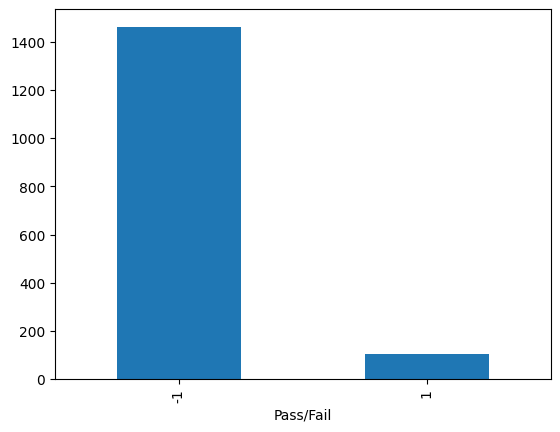

In [17]:
# 분포를 도수분포표로 확인합니다.
print(data['Pass/Fail'].value_counts())

# 분포를 막대 그래프를 사용하여 출력합니다.
data['Pass/Fail'].value_counts().plot(kind='bar')   # ...  코드 입력

### 3.2. 센서 데이터 시각화 하기

다수의 feature 데이터에 대해서 한눈에 볼 수 있도록 시각화를 수행할 때는 seaborn의 `pairplot`를 활용하여 해결할 수 있습니다.

590개 센서에 대한 출력을 `pairplot`으로 수행하기엔 출력 결과도 보기 힘들뿐더러 출력 시간도 매우 오래 걸립니다.

따라서 아래 코드와 같이 3,4,5, Pass/Fail 데이터에 대해서만 출력해보겠습니다.

In [18]:
#3,4,5,Pass/Fail 컬럼으로 새로운 DataFrame을 만듭니다. 리스트 안에 컬럼 이름을 적습니다.
data_plot= data[['3','4','5','Pass/Fail']]
data_plot

,3,4,5,Pass/Fail
0,1411.1265,1.3602,100.0,-1
1,1463.6606,0.8294,100.0,-1
2,1698.0172,1.5102,100.0,1
3,909.7926,1.3204,100.0,-1
4,1326.5200,1.5334,100.0,-1
...,...,...,...,...
1562,3085.3781,1.4843,100.0,-1
1563,1124.6595,0.8763,100.0,-1
1564,1110.4967,0.8236,100.0,-1
1565,1183.7287,1.5726,100.0,-1


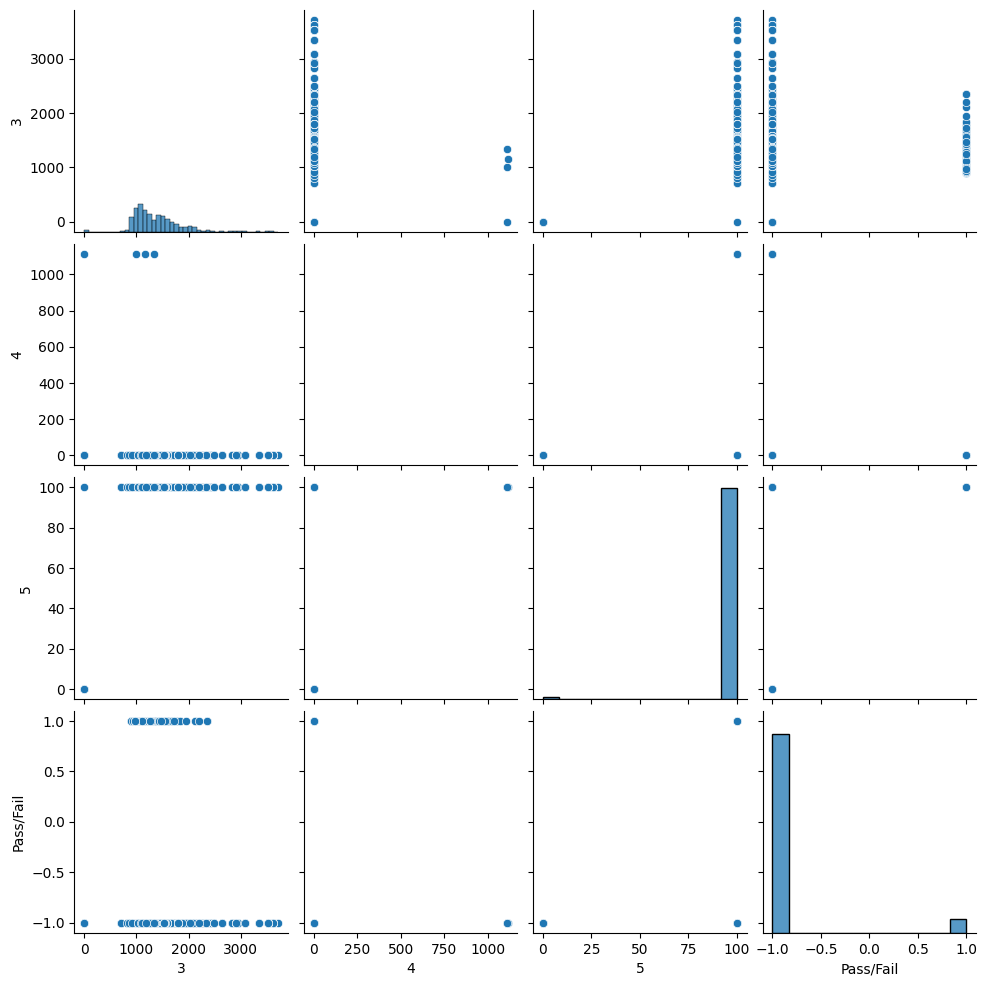

In [19]:
#seaborn의 pairplot()을 사용해서 컬럼끼리 비교할 수 있습니다.
sns.pairplot(data_plot)

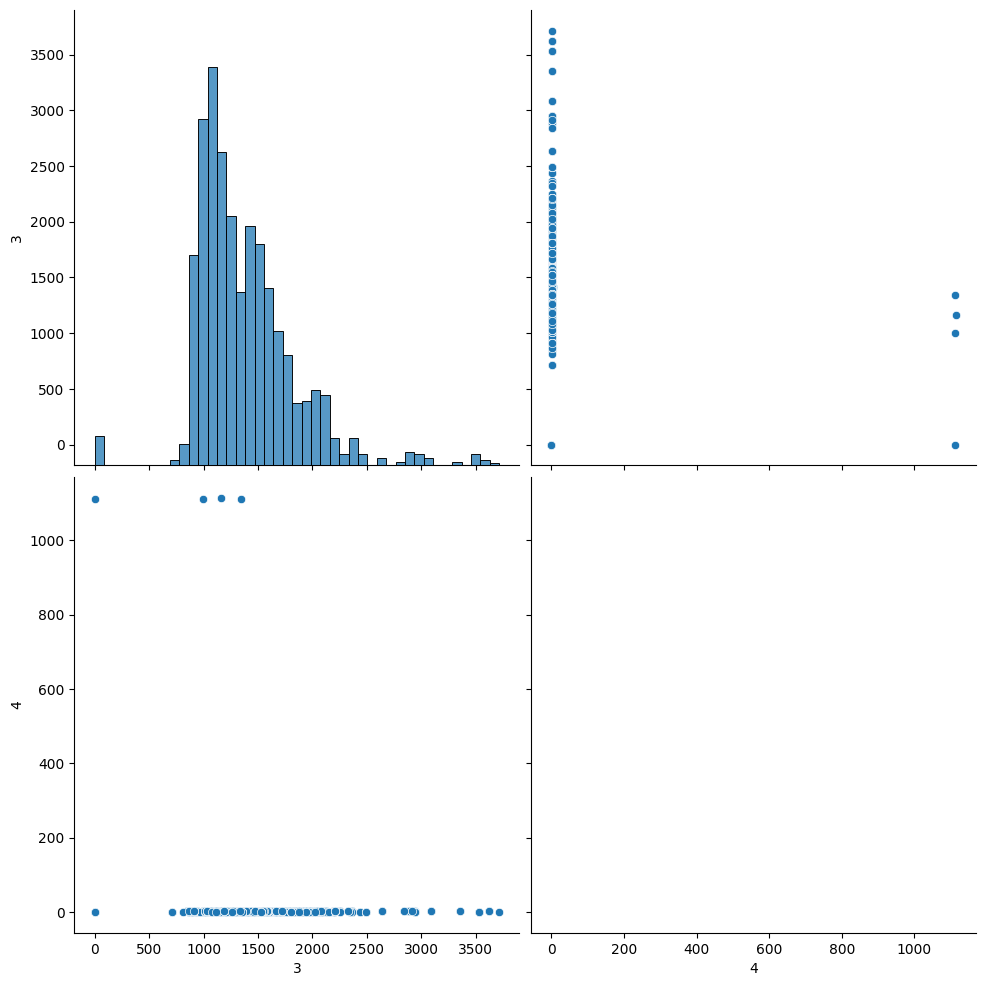

In [20]:
# vars를 사용해서 특정한 컬럼끼리 비교할 수도 있습니다.
sns.pairplot(data_plot, height=5, vars=['3','4'])

### 3.3. `59`번 센서 시각화

C:\Users\intel09\AppData\Local\Temp\ipykernel_24636\45376415.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['59'], color = 'darkblue')


Text(0.5, 1.0, '59 Sensor Measurements')

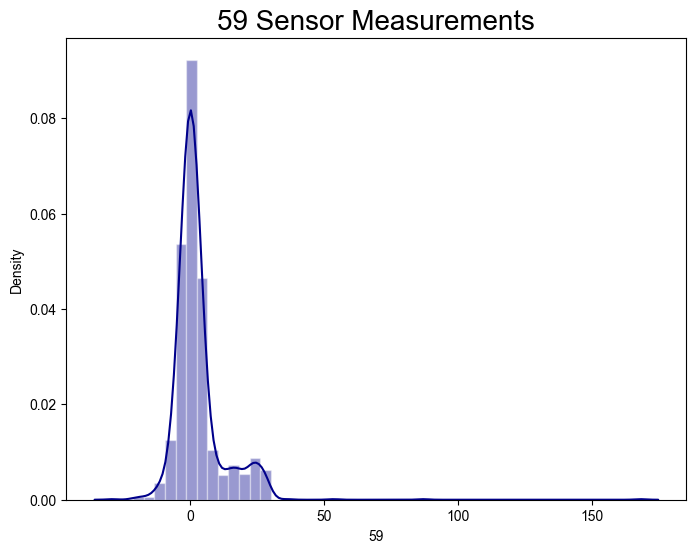

In [21]:
# subplots는 한 번에 여러 그래프를 보여주기 위해서 사용합니다.
# subplots()에선 두개의 값을 받을 수 있는데 figure와 axes 값을 받을 수 있습니다. 여기서 변수명은 상관없습니다. 순서가 중요합니다.
# fig: figure로써  전체 subplot을 말합니다.
# ax: axe로써 각각의 그래프를 말합니다.

fig, ax = plt.subplots(figsize=(8, 6))

# seborn 그래프의 스타일을 설정합니다.
sns.set(style='darkgrid')

# 59번 데이터의 분포를 출력합니다.
#sns.histplot(data['59'], color = 'darkblue')
sns.distplot(data['59'], color = 'darkblue')

# 그래프의 제목을 설정합니다.
plt.title('59 Sensor Measurements', fontsize = 20)

Text(0.5, 1.0, '59 Sensor Measurements')

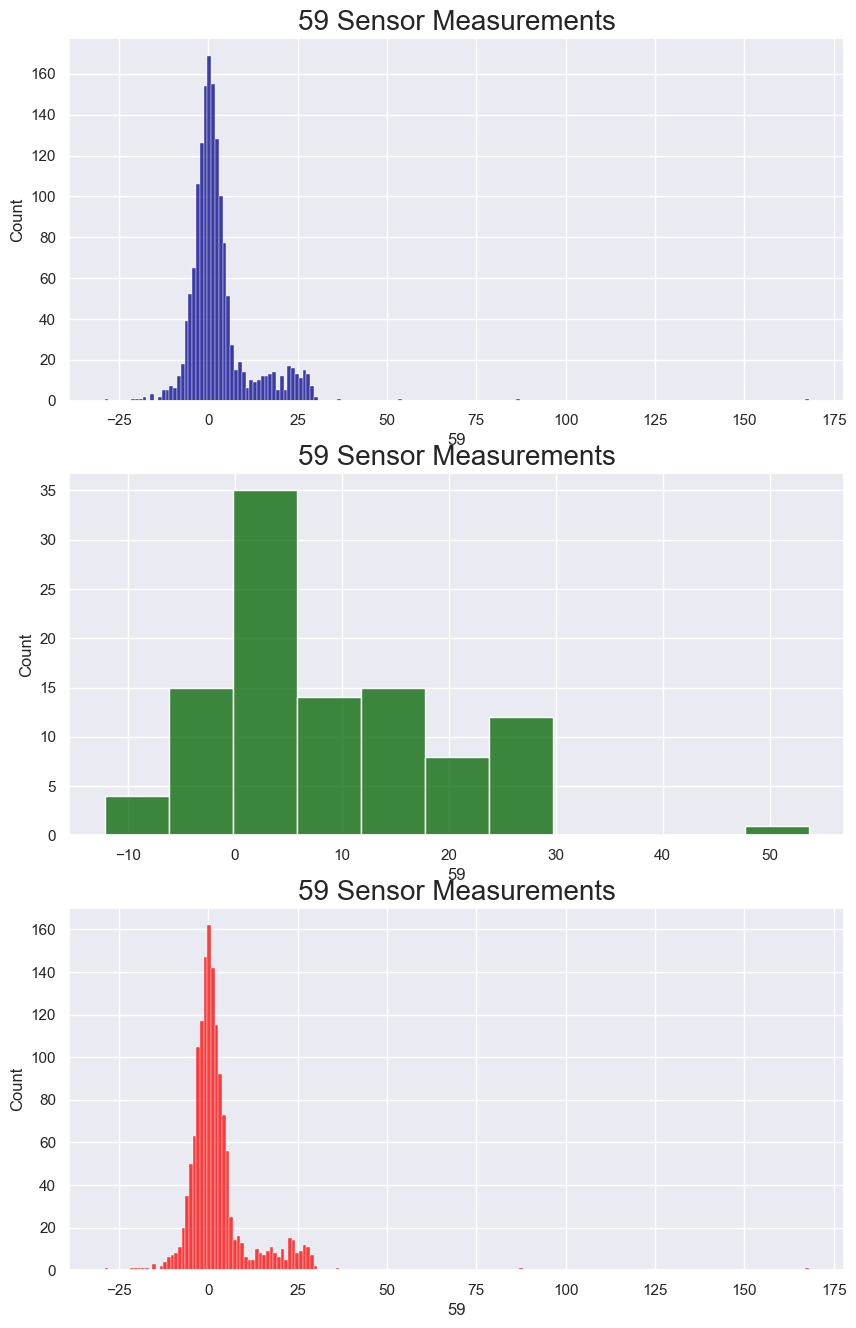

In [22]:
# 그래프의 사이즈를 설정합니다. 첫번째는 가로, 두번째는 세로의 크기입니다.
plt.rcParams['figure.figsize'] = (10, 16)

# 3x1 형태로 그래프를 출력하기 위하여 subplot을 설정합니다.
# subplot(행, 열, 인덱스)로 그래프의 위치를 정합니다.
plt.subplot(3, 1, 1)
sns.histplot(data['59'], color = 'darkblue')
plt.title('59 Sensor Measurements', fontsize = 20)

# 'Pass/Fail' 값이 1인 데이터를 출력합니다.
#  data[data['Pass/Fail']==1]를 하면 'Pass/Fail' 값이 1인 행만 사용할 수 있습니다.
plt.subplot(3, 1, 2)
sns.histplot(data[data['Pass/Fail']==1]['59'], color = 'darkgreen')
plt.title('59 Sensor Measurements', fontsize = 20)

# 'Pass/Fail' 값이 -1인 데이터를 출력합니다.
plt.subplot(3, 1, 3)
sns.histplot(data[data['Pass/Fail']==-1]['59'], color = 'red')
plt.title('59 Sensor Measurements', fontsize = 20)

## 4.데이터 전 처리

- 전체 데이터를 feature 데이터인 `x`와 label 데이터인 `y`로 분리하기
- StandardScaler를 통한 데이터 표준화하기

### 4.1.  `x`와  `y` : 특성 및 타겟 지정하기

머신러닝의 feature 데이터는 `Xx`, label 데이터는 `y`에 저장합니다.

In [24]:
# 예측해야 할 변수인 `Pass/Fail`를 제거하여 머신러닝 입력값인 X에 저장합니다.
X_train = data.drop(columns=['Pass/Fail'])   # ...  코드 입력

# 예측해야 할 변수 `Pass/Fail`만을 선택하여 numpy 형태로 y에 저장합니다.
y_train = data['Pass/Fail']   # ...  코드 입력

# ravel은 "풀다"로 다차원을 1차원으로 푸는 것을 의미합니다.
# 1차원 벡터 형태로 출력하기 위해 ravel 사용합니다.
y_train = y_train.to_numpy().ravel()
y_train

array([-1, -1,  1, ..., -1, -1, -1], shape=(1567,))

원본 데이터의 수가 많지 않기에 원본 데이터에서 샘플 데이터를 추출하고 노이즈를 추가하여 테스트 데이터를 생성하였습니다.

`data` 폴더 내의 `uci-secom-test.csv`에 590개의 센서 데이터와 `Pass/Fail`저장되어 있기에 해당 데이터를 읽어와 `x_test, y_test` 데이터로 분리합니다.

In [25]:
# data 폴더 내의 uci-secom-test.csv를 DataFrame으로 읽습니다.
data_test = pd.read_csv('data/secom_data/uci-secom-test.csv')   # ...  코드 입력

#x_test, y_test로 분리합니다. x , y 과 동일하게
X_test = data_test.drop(columns=['Pass/Fail'])   # ...  코드 입력
y_test = data_test['Pass/Fail'].to_numpy().ravel()   # ...  코드 입력

In [26]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3058.576438,2456.188003,2174.584701,1113.987638,1.017292,100.0,103.784665,0.124100,1.373089,0.008796,...,0.004038,53.973861,0.502555,0.012549,0.003425,2.494222,0.021644,0.017824,0.005433,98.028276
1,3225.540000,2500.380000,2211.400000,1511.784200,1.300400,100.0,97.470000,0.123700,1.367100,-0.019700,...,0.000000,0.000000,0.498500,0.031600,0.006600,6.343200,-0.004700,0.013400,0.003500,286.130300
2,3027.019797,2495.244836,2239.283771,1878.339266,1.875838,100.0,95.120185,0.122412,1.390140,0.006793,...,0.000000,0.000000,0.501425,0.013365,0.003555,2.673789,0.031982,0.013443,0.004191,40.419061
3,3021.865769,2415.728398,2182.942505,1101.940802,1.387535,100.0,103.816952,0.123432,1.513284,-0.027191,...,0.000287,3.060171,0.496957,0.013008,0.003423,2.617648,0.034111,0.024022,0.009235,70.072016
4,2998.755593,2411.935120,2208.165877,1172.869419,1.364676,100.0,101.940758,0.120709,1.449954,-0.002415,...,0.000000,0.000000,0.502647,0.012165,0.003780,2.415892,0.021732,0.012311,0.004373,56.939737


### 4.2. 데이터 표준화

각 변수 마다의 스케일 차이를 맞추기 위하여 표준화를 수행합니다.

표준화는 서로 다른 피처의 크기를 통일하기 위해서 크기를 변환해주는 개념입니다.

데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 형태와 가까워지도록 변환합니다.

In [27]:
from sklearn.preprocessing import StandardScaler

# 정규화를 위해서 StandardScaler 불러옵니다.
sc = StandardScaler()   # ...  코드 입력

# x_train에 있는 데이터에 맞춰 정규화를 진행합니다.
X_train = sc.fit_transform(X_train)   # ...  코드 입력
X_test = sc.transform(X_test)   # ...  코드 입력

In [28]:
X_train[:5]

array([[ 0.13999828,  0.42920791,  0.03273532, ..., -1.86846064,
        -1.84076867, -1.0611589 ],
       [ 0.46402024, -0.10587396,  0.23685169, ...,  0.41258698,
         0.25102908,  1.15695081],
       [-0.35125598,  0.40723307,  0.02641324, ...,  3.62421124,
         3.31899911, -0.17840653],
       [-0.07090329, -0.02598515,  0.08676611, ..., -0.17753479,
        -0.30678365, -0.27446928],
       [ 0.14654367,  0.09834047,  0.25093078, ..., -0.17753479,
        -0.30678365, -0.27446928]], shape=(5, 590))

## 5.머신러닝 모델 학습

### 로지스틱 회귀
로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘입니다.

로지스틱 회귀는 회귀라는 말이 들어갔지만 분류에 사용됩니다.

로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아닙니다.

시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다는 점입니다.

확률에 따라서 분류를 결정합니다.

로지스틱 회귀는 주로 이진(0과 1) 분류에 사용됩니다. 로지스틱 회귀에서 예측 값은 예측 확률의 의미합니다.

예측 값 즉, 예측 확률이 0.5이상이면 1로, 그렇지 않으면 0으로 예측합니다.

### 5.1. 기본 분류 모델 학습 - 로지스틱 분류기

In [ ]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 분류기 모델 class를 가져 옵니다.
# max_iter는 로지스틱 알고리즘의 반복 횟수를 정하는 파라미터로 본 실습에서는 default 값으로는 모자르기에 아래와 같이 설정합니다.
model = LogisticRegression(max_iter=1000)   # ...  코드 입력

# 데이터를 학습시킬 때는 fit 함수를 사용합니다.
model.fit(X_train, y_train)   # ...  코드 입력

# score 함수를 사용하여 모델의 성능을 확인합니다.
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9738353541799617
0.8466666666666667


In [30]:
# Logistic Regression의 중요도를 계산합니다.
# 가중치 값들의 크기로 판단하기에 .coef_로 해당 값들을 불러옵니다.
abs_coef = np.abs(model.coef_).ravel()
abs_coef

array([0.0198451 , 0.15293288, 0.22085497, 0.2444742 , 0.04826122,
       0.44398903, 0.12385769, 0.51899095, 0.15569657, 0.32425601,
       0.18248617, 0.04300931, 0.2070548 , 0.        , 0.5226372 ,
       0.28332571, 0.59623984, 0.3142265 , 0.34900783, 0.14860258,
       0.26744395, 0.54609978, 0.02177359, 0.15861112, 0.22443492,
       0.93700487, 0.50897469, 0.04777091, 0.12998671, 0.90347061,
       0.66721155, 0.06426501, 0.25465656, 0.43800629, 0.03908915,
       0.40835409, 0.19211482, 0.08596882, 0.11452151, 0.20774871,
       0.44459186, 0.18050043, 0.01050238, 0.17752354, 0.01381023,
       0.53517472, 0.25320538, 0.24842116, 0.39742337, 0.01050238,
       0.23391517, 0.2057444 , 0.        , 0.43185854, 0.61641794,
       0.26669695, 0.39028954, 0.25380964, 0.81489202, 1.54543369,
       0.34274468, 0.43486028, 0.62325113, 0.50057618, 1.12139144,
       0.92983804, 0.25901348, 0.57299986, 0.49312767, 0.02300687,
       0.10534038, 0.46202346, 0.26603742, 0.04177238, 0.01557

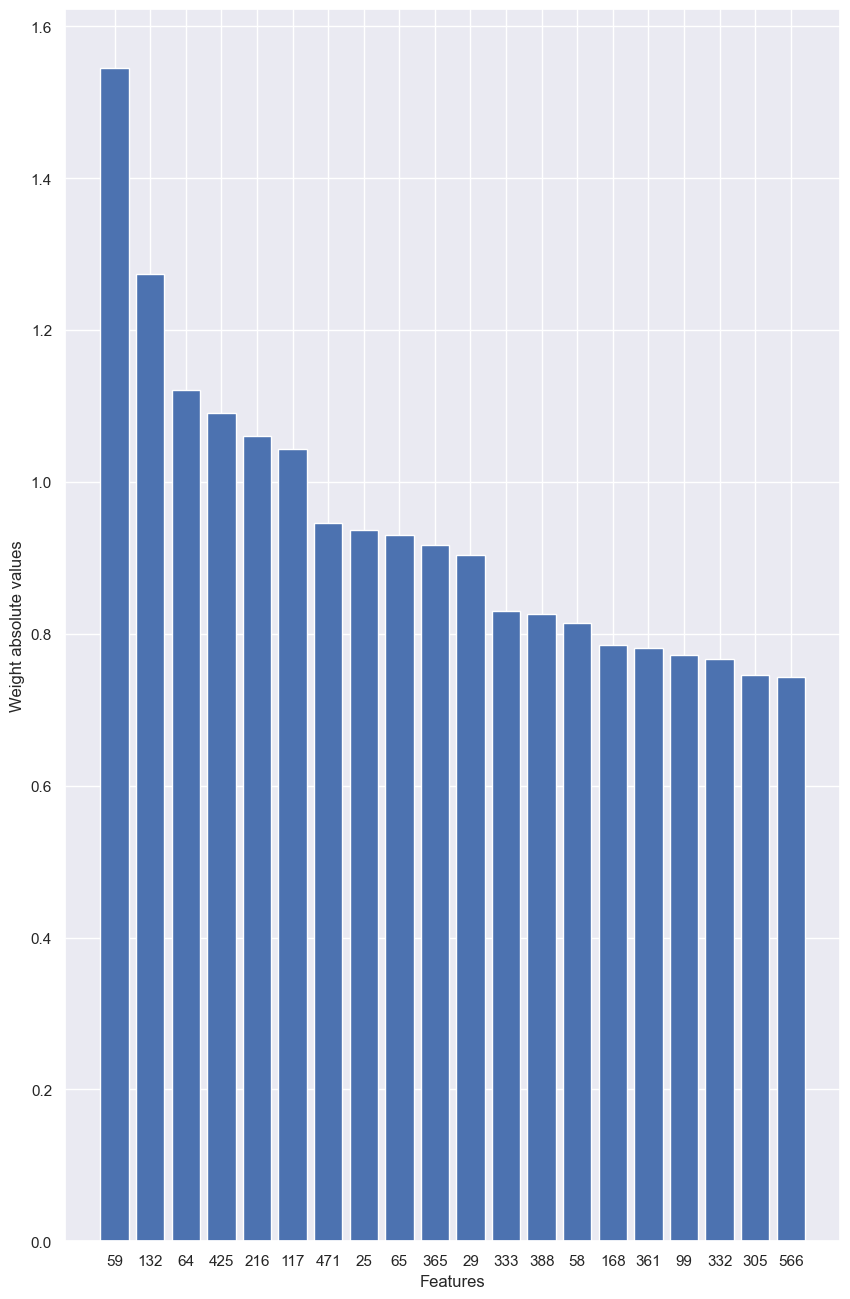

In [31]:
# bar 형태 그래프로 Logistic Regression의 feature 별 중요도를 상위 20개 출력합니다.
# 상위 20개의 feature 정보를 출력하기 위하여 sorting을 수행하고 해당 feature 번호를 LR_imort_x에 저장합니다.
LR_import_x = [str(i[0]) for i in sorted(enumerate(abs_coef), key=lambda x:x[1], reverse=True)]

plt.bar(LR_import_x[:20], sorted(abs_coef, reverse=True)[:20])

plt.rcParams['figure.figsize'] = (15, 10)
plt.xlabel('Features')
plt.ylabel('Weight absolute values')
plt.show()

### 5.2. 다양한 분류 모델 학습

In [ ]:
#xgboost 설치가 잘 안되면 Anaconda Powershell Prompt(anaconda3)에서 해봅니다.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#여러 모델을 append해서 추가합니다.
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))  # LDA 모델
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('CART', DecisionTreeClassifier()))  # 의사결정트리 모델
models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델

for name, model in models:
    # fit으로 학습을 합니다.
    model.fit(X_train, y_train)

    # %s와 %f는 문자열 포맷팅으로 %s는 문자열, %f는 숫자형 데이터를 말합니다.
    # 문자열 포맷팅 값은 괄호()안의 값과 대응됩니다.
    # score 함수를 사용하여 모델의 성능을 확인합니다.
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(X_train, y_train), model.score(X_test, y_test))
    print(msg)

LDA - train_score : 0.971921, test score : 0.883333


c:\Users\intel09\anaconda3\envs\envtest\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\intel09\anaconda3\envs\envtest\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\intel09\anaconda3\envs\envtest\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\intel09\anaconda3\envs\envtest\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\intel09\anaconda3\envs\envtest\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, a

KNN - train_score : 0.934269, test score : 0.548333
CART - train_score : 1.000000, test score : 0.655000
NB - train_score : 0.181238, test score : 0.570000
RF - train_score : 1.000000, test score : 0.503333
SVM - train_score : 0.938098, test score : 0.488333


### 앙상블모델 - xgboost  사용해보기

In [34]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

model_xgb = XGBClassifier()  # XGB 모델

import numpy as np

#y_train에서 -1을 0으로 변경
y_train_modified = np.where(y_train == -1, 0, y_train)
y_test_modified = np.where(y_test == -1, 0, y_test)

model_xgb.fit(X_train, y_train_modified)

# %s와 %f는 문자열 포맷팅으로 %s는 문자열, %f는 숫자형 데이터를 말합니다.
# 문자열 포맷팅 값은 괄호()안의 값과 대응됩니다.
# score 함수를 사용하여 모델의 성능을 확인합니다.
msg = "%s - train_score : %f, test score : %f" % (name, model.score(X_train, y_train_modified), model.score(X_test, y_test_modified))
print(msg)

SVM - train_score : 0.004467, test score : 0.010000


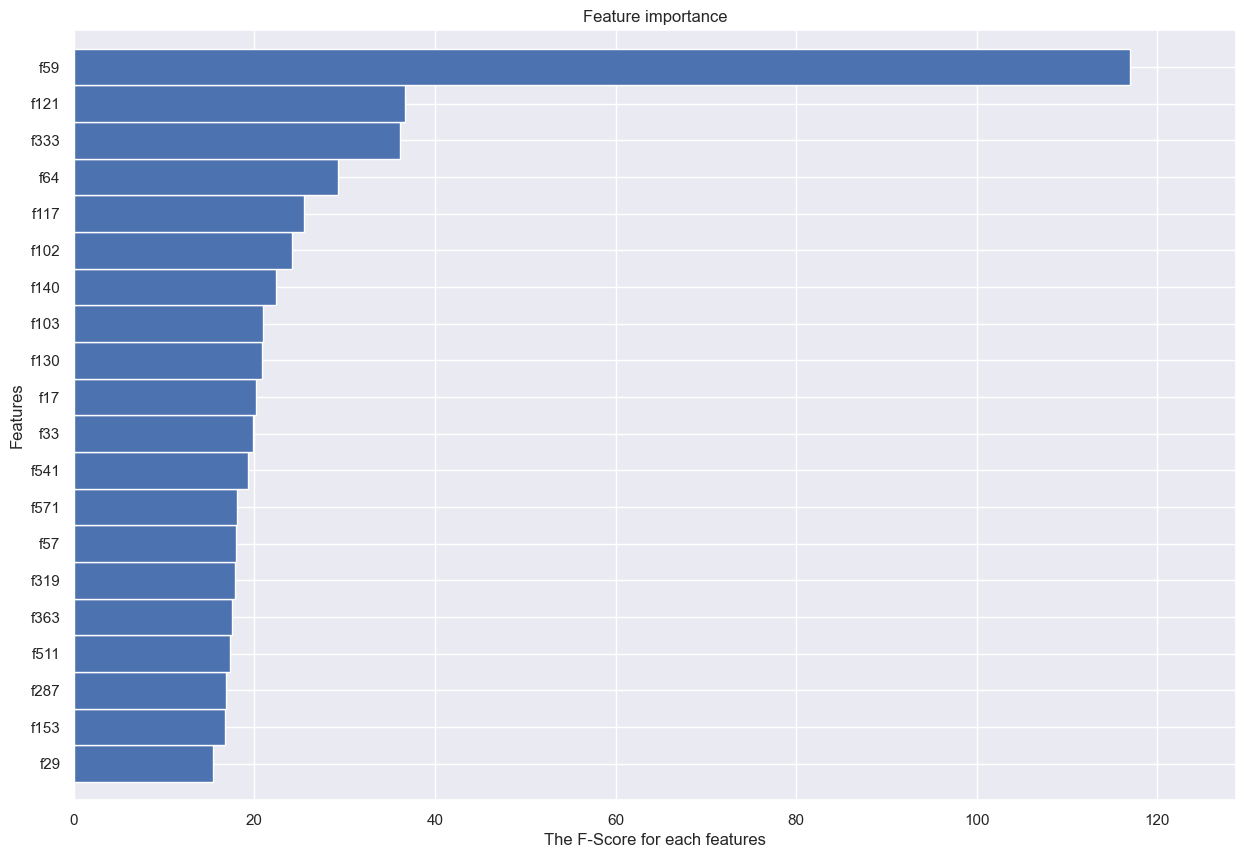

In [35]:
# xgb 모델에서 변수 중요도를 출력합니다.
# xgboost 모듈의 plot_importance는 피처 중요도를 시각화할 때 사용합니다.
# importance_type는 중요도가 어떻게 계산되는지 정합니다.
# weight는 나온 횟수를 말합니다. gain은 평균적인 이득을 말합니다. cover는 coverage의 평균입니다.

# 피처 중요도를 그래프로 표현합니다.
xgb.plot_importance(model_xgb.get_booster(), height=1, grid=True, importance_type='total_gain', show_values=False, max_num_features=20)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Features')
plt.show()

## 6.평가 및 예측

학습 과정에서 학습 데이터와 테스트 데이터에 대해서 accuracy 계산하여 평가하였습니다.

accuracy의 경우 아래 식에서 알 수 있듯이 얼마나 정확히 예측했는가를 정량적으로 나타냅니다.

$Accuracy = \frac{Number \;of \;correct \;predictions}{Total \; number \;of \;predictions} $

Accuracy 값이 높으면 좋은 성능을 낸다고도 할 수 있지만 이번 실습인 공정 이상 예측에서는 recall 값 또한 살펴봐야 합니다.

오차행렬(Confusion Matrix)은 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표입니다.

+ TN : Negative(0)로 예측했고, 실제로도 True인 경우 - 실제는 Negative
+ FP : Positive(1)로 예측했지만 실제는 False인 경우 - 실제는 Negative
+ FN : Negative(0)로 예측했고, 실제는 False인 경우 - 실제는 Positive
+ TP : Positive(1)로 예측했고, 실제로도 True인 경우 - 실제는 Positive

공정 이상 예측에서 중요한 것은 이상 없음을 정확히 예측하는 것 보단 이상 있음을 정확히 예측하는 것입니다.

recall 방식은 `예측한 이상 있음` 대비 `실제 이상 있음`의 비율을 나타내기에 accuracy에서 놓칠 수 있는 결과 해석을 보충합니다.

정밀도(Precision)는 예측을 Positve로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다. 정밀도는 FP가 낮아야 합니다.
+ TP / (FP + TP)

재현율(recall)은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 말합니다. 재현율은 FN이 낮아야 합니다.
+ TP / (FN + TP)


이번 파트에서는 recall 방식을 포함한 또 다른 대표적인 평가 방법에 대해서 알아보고 주어진 데이터에 대해서 예측하는 것을 수행해보겠습니다.

### 6.1. Confusion Matrix

기존 score에서 볼 수 있었던 결과는 accuracy 기반의 결과였습니다. confusion matrix를 출력하여 각 class 별로 예측한 결과에 대해서 자세히 알아봅시다.

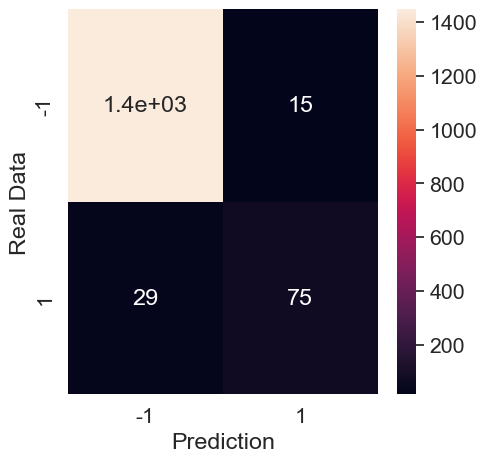

array([[1448,   15],
       [  29,   75]])

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# LinearDiscriminantAnalysis 모델의 confusion matrix를 사용하기 위하여 학습용 데이터의 예측값을 저장합니다.
# models[0]는 LDA
model_predition_train = models[0][1].predict(X_train)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
cm_train = confusion_matrix(y_train, model_predition_train)    # ... 코드입력

# 출력 파트 - seaborn의 heatmap을 사용
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)

# annot은 annotate each cell with numeric value로 셀에 숫자값을 표시하는지 정하는 것입니다.
# cmap으로 색깔을 지정할 수 있습니다. cmap='RdYlGn_r' cmap="YlGnBu"
ax = sns.heatmap(cm_train, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
ax.set_xticklabels((-1,1))
ax.set_yticklabels((-1,1))
plt.show()
cm_train

위 confusion matrix에서 x 축은 실제 데이터의 label을 의미하고 y 축은 예측한 데이터의 label을 의미합니다.

- **0,0 의 값:** `이상 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `이상 없음(Pass)`인 경우의 개수
- **0,1 의 값:** `이상 있음(Fail)` 이라고 예측했을 때, 실제 데이터가 `이상 없음(Pass)`인 경우의 개수
- **1,0 의 값:** `이상 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `이상 있음(Fail)`인 경우의 개수
- **1,1 의 값:** `이상 있음(Fail)` 이라고 에측했을 때, 실제 데이터가 `이상 있음(Fail)`인 경우의 개수

In [39]:
# LinearDiscriminantAnalysis의 x_test에 대한 예측값을 구하고 confusion_matrix() 를 사용하면 confusion matrix를 구할 수 있습니다.

model_predition_train = models[0][1].predict(X_test)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
cm_test = confusion_matrix(y_test, model_predition_train)


### 6.2. Precision & Recall

분류 모델의 또 다른 성능 지표로 Precsion과 Recall를 구하여 봅시다.

In [40]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# sklearn에서 제공하는 recall_score, precision_score를 사용하여 recall과 precision 결과물을 출력합니다.
print("Recall score: {}".format(recall_score(y_test, models[0][1].predict(X_test))))
print("Precision score: {}".format(precision_score(y_test, models[0][1].predict(X_test))))

Recall score: 0.7795527156549521
Precision score: 0.9959183673469387


### 6.3. 테스트 데이터의 예측값 출력

테스트 데이터를 하나씩 입력하여 그 결과를 출력해 봅시다.

In [41]:
# 0번부터 9번까지 10개를 출력해보겠습니다.
for i in range(10):

    # LDA 모델을 사용하였습니다.
    # reshape()에서 -1이 들어간 곳은 가변적으로 바꿉니다. 예를 들어 12개의 원소가 있고 reshape(-1,2)를 하면 열 2개를 맞추기 위해서 행을 6개로 바꿉니다.
    prediction = models[0][1].predict(X_test[i].reshape(1,-1))

    #문자열 포맷팅의 방법입니다. {}가 괄호()안의 값에 각각 대응됩니다.
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

0 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
1 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: -1
2 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
3 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: 1
4 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
5 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
6 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
7 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
8 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
9 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1


### 6.4.타겟데이터 증강한 후 다시 모델 학습 진행

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 데이터 로드
train_data = pd.read_csv('./data/secom_data/uci-secom.csv')
test_data = pd.read_csv('./data/secom_data/uci-secom-test.csv')

train_data = train_data.replace(np.nan, 0)
train_data = train_data.drop(columns = ['Time'], axis = 1)

# 데이터 분리 (학습 데이터와 테스트 데이터)
X_train = train_data.drop(columns=['Pass/Fail'])
y_train = train_data['Pass/Fail']
X_test = test_data.drop(columns=['Pass/Fail'])
y_test = test_data['Pass/Fail']

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 데이터 불균형 해결 (SMOTE 사용)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# 여러 모델 학습 및 평가
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

results = []

for name, model in models:
    model.fit(X_train_res, y_train_res)
    train_score = model.score(X_train_res, y_train_res)
    test_score = model.score(X_test_scaled, y_test)
    results.append((name, train_score, test_score))
    msg = f"{name} - train_score : {train_score:.6f}, test score : {test_score:.6f}"
    print(msg)

# 결과 출력
results_df = pd.DataFrame(results, columns=["Model", "Train Score", "Test Score"])
results_df

LDA - train_score : 0.965140, test score : 0.973333
KNN - train_score : 0.712235, test score : 0.680000
DecisionTree - train_score : 1.000000, test score : 0.846667
NB - train_score : 0.597403, test score : 0.600000
RandomForest - train_score : 1.000000, test score : 0.978333
SVM - train_score : 0.995215, test score : 0.990000


,Model,Train Score,Test Score
0,LDA,0.965140,0.973333
1,KNN,0.712235,0.680000
2,DecisionTree,1.000000,0.846667
3,NB,0.597403,0.600000
4,RandomForest,1.000000,0.978333
5,SVM,0.995215,0.990000
